In [21]:
import numpy as np

# Load and display the content of the .npy file from ./intrinsics
intrinsics_path = './intrinsics.npy'
intrinsics_data = np.load(intrinsics_path)
print(len(intrinsics_data))
print("Intrinsics Data:")
print(intrinsics_data)

# Load and display the content of the .npy file from ./trajectories
trajectories_path = './trajectories.npy'
trajectories_data = np.load(trajectories_path)
print(len(trajectories_data))
print("Trajectories Data:")
print(trajectories_data)

326
Intrinsics Data:
[[256.     192.     211.949  211.949  127.933   95.9333]
 [256.     192.     211.949  211.949  127.933   95.9333]
 [256.     192.     211.949  211.949  127.933   95.9333]
 ...
 [256.     192.     211.949  211.949  127.933   95.9333]
 [256.     192.     211.949  211.949  127.933   95.9333]
 [256.     192.     211.949  211.949  127.933   95.9333]]
326
Trajectories Data:
[[[-9.96339180e-01 -2.46066198e-03 -8.54528104e-02  2.83953721e+00]
  [ 8.42477996e-02 -1.97925132e-01 -9.76589960e-01  5.49763725e-02]
  [-1.45102010e-02 -9.80214052e-01  1.97407869e-01  9.71003886e-01]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 [[-9.61517686e-01 -8.28996811e-02  2.61937744e-01  1.39300705e+00]
  [-2.73944146e-01  3.61932985e-01 -8.91043837e-01 -3.08815687e-01]
  [-2.09366599e-02 -9.28510720e-01 -3.70714849e-01  8.50533612e-01]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 [[-8.22079149e-01  6.71132136e-02 -5.65404006e-01  1.557200

In [22]:
# Load and display the content of the .npy file from ./pairs
pairs_path = './pairs.npy'
pairs_data = np.load(pairs_path)
print(len(pairs_data))
print("Pairs Data:")
print(pairs_data)

13572
Pairs Data:
[[  0.           6.           0.98182726]
 [  0.          11.           0.95408869]
 [  0.          17.           0.9272784 ]
 ...
 [318.         325.           0.94236207]
 [319.         321.           0.34654981]
 [321.         322.           0.36172217]]


In [27]:
# Load and display the content of the .npy file from ./pairs
images_path = './images.npy'
images_data = np.load(images_path)
images_data = images_data.tolist()
print("Pairs Data:")
# print(images_data)

idx_img1 = images_data.index("41126466_5184.748.png")
idx_img2 = images_data.index("41126466_5194.144.png")
print(images_data[idx_img1])
print(images_data[idx_img2])

print(idx_img1)
print(idx_img2)
print(trajectories_data[idx_img1])
print(trajectories_data[idx_img2])

print(intrinsics_data[idx_img1])
print(intrinsics_data[idx_img2])

Pairs Data:
41126466_5184.748.png
41126466_5194.144.png
56
0
[[-0.93176419  0.00459866  0.3630349   1.34293352]
 [-0.36280912  0.02566976 -0.93150985 -0.19745206]
 [-0.01360272 -0.9996599  -0.02224973  0.97701343]
 [ 0.          0.          0.          1.        ]]
[[-9.96339180e-01 -2.46066198e-03 -8.54528104e-02  2.83953721e+00]
 [ 8.42477996e-02 -1.97925132e-01 -9.76589960e-01  5.49763725e-02]
 [-1.45102010e-02 -9.80214052e-01  1.97407869e-01  9.71003886e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[256.     192.     211.949  211.949  127.933   95.9333]
[256.     192.     211.949  211.949  127.933   95.9333]


In [29]:
def find_image_index(image_name, images_list):
    try:
        return images_list.index(image_name)
    except ValueError:
        print(f"Image {image_name} not found in images_data.")
        return None

In [62]:
imgs = ["41126466_5194.144.png", "41126466_5184.748.png"]
img_idxs = [find_image_index(img, images_data) for img in imgs]

In [73]:
idx = img_idxs[0]
print(trajectories_data[idx])
R1 = trajectories_data[idx][:3, :3]
t1 = trajectories_data[idx][:3, 3]    

idx = img_idxs[1]
print(trajectories_data[idx])
R2 = trajectories_data[idx][:3, :3]
t2 = trajectories_data[idx][:3, 3]

R1_R2 = np.linalg.inv(R1) @ R2
t1_t2 = t2 - t1
print("R1_R2:")
print(R1_R2)
print("t1_t2:")
print(t1_t2)

R1_R1 = np.identity(3)
t1_t1 = np.zeros(3)

K = np.vstack((intrinsics_data[img_idxs[0]].reshape(2, 3), np.array([0, 0, 1])))

print(K)

[[-9.96339180e-01 -2.46066198e-03 -8.54528104e-02  2.83953721e+00]
 [ 8.42477996e-02 -1.97925132e-01 -9.76589960e-01  5.49763725e-02]
 [-1.45102010e-02 -9.80214052e-01  1.97407869e-01  9.71003886e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[-0.93176419  0.00459866  0.3630349   1.34293352]
 [-0.36280912  0.02566976 -0.93150985 -0.19745206]
 [-0.01360272 -0.9996599  -0.02224973  0.97701343]
 [ 0.          0.          0.          1.        ]]
R1_R2:
[[ 0.89798468  0.01208606 -0.43986071]
 [ 0.08743537  0.97478867  0.2052854 ]
 [ 0.43125233 -0.22280253  0.87428855]]
t1_t2:
[-1.49660369 -0.25242844  0.00600954]
[[256.     192.     211.949 ]
 [211.949  127.933   95.9333]
 [  0.       0.       1.    ]]


In [74]:
T_x = np.array([[0, -t1_t2[2], t1_t2[1]],                
                [t1_t2[2], 0, -t1_t2[0]],
                [-t1_t2[1], t1_t2[0], 0]])

F = np.linalg.inv(K.T) @ T_x @ R1_R2 @ np.linalg.inv(K)

p_img1 = np.array([50, 50, 1])

l_prime = F @ p_img1
l_prime = l_prime / np.sqrt(l_prime[0]**2 + l_prime[1]**2)


print("Epipolar Line:")
print(l_prime)

img_width = 256
img_height = 192

# Compute two points on the epipolar line
x0, y0 = 0, int(-l_prime[2] / l_prime[1]) if l_prime[1] != 0 else 0
x1, y1 = img_width, int((-l_prime[0] * img_width - l_prime[2]) / l_prime[1]) if l_prime[1] != 0 else 0

print(f"Points on the epipolar line: ({x0}, {y0}), ({x1}, {y1})")


Epipolar Line:
[  0.62953349  -0.77697335 -33.2094734 ]
Points on the epipolar line: (0, -42), (256, 164)


In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [76]:
# Read the image using Matplotlib
img1 = np.array(plt.imread(imgs[0].replace('.png', '.jpg')))
img2 = np.array(plt.imread(imgs[1].replace('.png', '.jpg')))

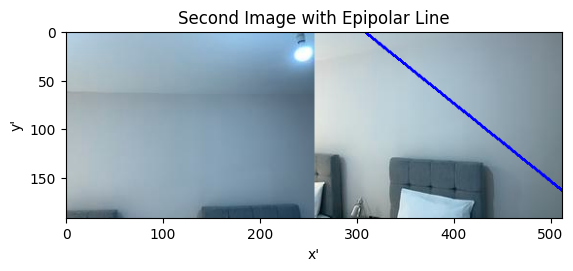

In [77]:
# Draw the epipolar line on the second image
cv2.line(img2, (x0, y0), (x1, y1), (255, 0, 0), 2)  # Blue line

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(np.hstack((img1, img2)), cv2.COLOR_BGR2RGB))
plt.title("Second Image with Epipolar Line")
plt.xlabel("x'")
plt.ylabel("y'")
plt.scatter([], [], c='b', label='Epipolar Line')  # Dummy scatter for legend
# plt.legend()
plt.show()